In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

titanic_data = pd.read_csv("C:/Users/bagchi/Downloads/train_titanic.csv")

In [87]:
len(titanic_data)

891

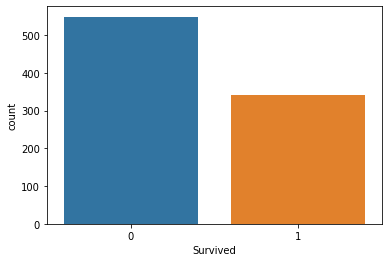

In [88]:
sns.countplot(x='Survived',data=titanic_data)

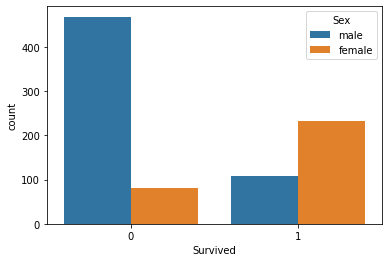

In [89]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

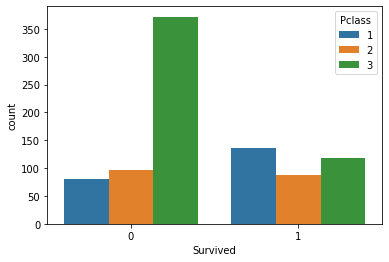

In [90]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

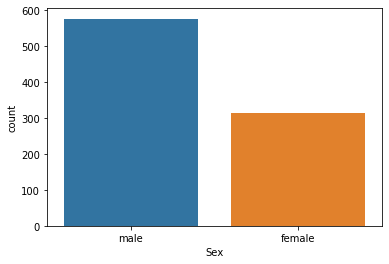

In [91]:
sns.countplot(x='Sex',data=titanic_data)

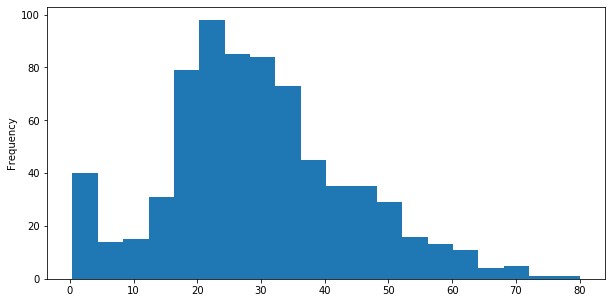

In [92]:
titanic_data['Age'].plot.hist(bins=20,figsize=[10,5])

In [93]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


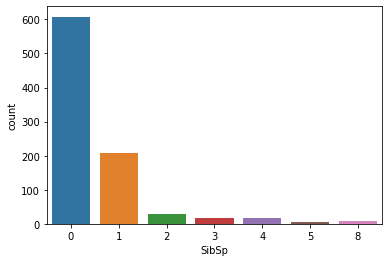

In [94]:
sns.countplot(x='SibSp',data=titanic_data)

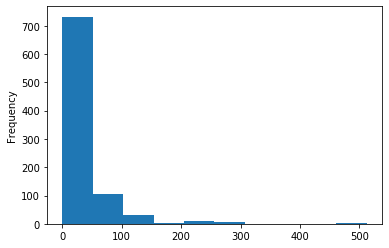

In [95]:
titanic_data['Fare'].plot.hist()

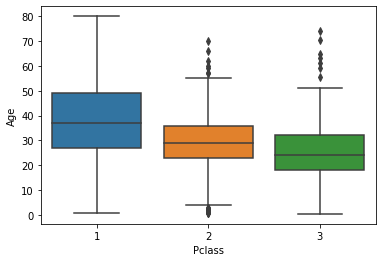

In [96]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [97]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [99]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [100]:
titanic_data.dropna(inplace=True)

In [101]:
titanic_data.shape

(712, 11)

In [102]:
sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [103]:
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [104]:
embark=pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [105]:
pcl=pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [106]:
titanic_data=pd.concat([titanic_data, sex, embark, pcl], axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [107]:
titanic_data.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [108]:
titanic_data.drop(['Pclass'],axis=1,inplace=True)
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [109]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [121]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

In [122]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.80      0.80        85\n           1       0.70      0.69      0.70        58\n\n    accuracy                           0.76       143\n   macro avg       0.75      0.74      0.75       143\nweighted avg       0.75      0.76      0.75       143\n'

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[68, 17],
       [18, 40]], dtype=int64)

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7552447552447552